In [1]:
#R Script for Project#
library(TSA)

data=read.csv("MooseData.csv",header=T)       
names(data)=c("year", "fairbanksPop", "mooseHarvest", "totalMoose", "avgSnow", "wolfPop") 

years=data[,"year"] 
ts_fairbanksPop=ts(data[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data[,"wolfPop"],start=1965, freq=1)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



In [2]:
n = nrow(data)
# train data
data.train=data[1:(n-4),]
# test data
data.test=data[(n-3):n,]

In [3]:
dts_fairbanksPop= diff(ts_fairbanksPop)
dts_mooseHarvest= diff(ts_mooseHarvest)
dts_totalMoose= diff(ts_totalMoose)
dts_avgSnow= diff(ts_avgSnow)
dts_wolfPop= diff(ts_wolfPop)

In [4]:
library(vars)
###VAR Model##
ddata.train=cbind(dts_fairbanksPop,dts_mooseHarvest,dts_totalMoose, dts_avgSnow,dts_wolfPop)
##Model Selection
VARselect(ddata.train, lag.max = 20)$selection

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      4      4      5

In [5]:
## Model Fitting: Unrestricted VAR
model.var=VAR(ddata.train, p=4)
summary(model.var)


VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 37 
Log Likelihood: -1087.283 
Roots of the characteristic polynomial:
0.9182 0.9182 0.9142 0.9142 0.8961 0.8961 0.8576 0.8576 0.8313 0.8313 0.7272 0.7272 0.7175 0.6669 0.6037 0.6037 0.6001 0.6001 0.3117 0.02105
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_fairbanksPop.l1 + dts_mooseHarvest.l1 + dts_totalMoose.l1 + dts_avgSnow.l1 + dts_wolfPop.l1 + dts_fairbanksPop.l2 + dts_mooseHarvest.l2 + dts_totalMoose.l2 + dts_avgSnow.l2 + dts_wolfPop.l2 + dts_fairbanksPop.l3 + dts_mooseHarvest.l3 + dts_totalMoose.l3 + dts_avgSnow.l3 + dts_wolfPop.l3 + dts_fairbanksPop.l4 + dts_mooseHarvest.l4 + dts_totalMoose.l4 + dts_avgSnow.l4 + dts_wolfPop.l4 + const 

                      Estimate Std. Error t value Pr(>|t|)  
dts_fairbanksPop.l1    0.07998    0.27906   0.287  

In [6]:
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)


VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 37 
Log Likelihood: -1136.004 
Roots of the characteristic polynomial:
0.8925 0.8925 0.8546 0.8546 0.8418 0.8418 0.7902 0.7902 0.7736 0.7736 0.7413 0.7413 0.6599 0.5599 0.4592 0.4592 1.028e-06 1.028e-06 1.028e-06     0
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_totalMoose.l1 + dts_fairbanksPop.l2 + dts_avgSnow.l3 + dts_wolfPop.l3 + const 

                     Estimate Std. Error t value Pr(>|t|)    
dts_totalMoose.l1      0.9983     0.4223   2.364 0.024325 *  
dts_fairbanksPop.l2   -0.6592     0.1322  -4.987 2.06e-05 ***
dts_avgSnow.l3        97.3214    43.3835   2.243 0.031931 *  
dts_wolfPop.l3        29.6366    13.7399   2.157 0.038624 *  
const               1605.7093   417.3997   3.847 0.000537 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

we apply wald test for dts_totalMoose to reconicle with above restricted model if the other time series granger cause it.

In [7]:
## Granger Causality: Wald Test
library(aod)
coef.moosepop = coefficients(model.var)$dts_totalMoose[-(5*4+1),1]
var.model = vcov(model.var)[1:(5*4),1:(5*4)]
## Granger Causality: Fairbanks Population
wald.test(b=coef.moosepop, var.model, Terms=seq(1, 5*4, 5))
## Granger Causality: Moose Harvest
wald.test(b=coef.moosepop, var.model, Terms=seq(2, 5*4, 5))
## Granger Causality: Average Snow Fall
wald.test(b=coef.moosepop, var.model, Terms=seq(4, 5*4, 5))
## Granger Causality: Wolf Population
wald.test(b=coef.moosepop, var.model, Terms=seq(5, 5*4, 5))
## Granger Causality: Wolf Population & Fairbanks Population
wald.test(b=coef.moosepop, var.model, Terms=c(seq(1, 5*4, 5),seq(5, 5*4, 5)))

Warning message:
"package 'aod' was built under R version 3.6.3"

Wald test:
----------

Chi-squared test:
X2 = 3.9e-05, df = 4, P(> X2) = 1.0

Wald test:
----------

Chi-squared test:
X2 = 60.8, df = 4, P(> X2) = 2e-12

Wald test:
----------

Chi-squared test:
X2 = 128.5, df = 4, P(> X2) = 0.0

Wald test:
----------

Chi-squared test:
X2 = 0.051, df = 4, P(> X2) = 1.0

Wald test:
----------

Chi-squared test:
X2 = 0.063, df = 8, P(> X2) = 1.0

Moose Harvest and Snowfall granger cause Moose population. Now we use them for VAR:

In [8]:
## Model Selection
ddata.train=cbind(dts_mooseHarvest,dts_totalMoose, dts_avgSnow)
VARselect(ddata.train, lag.max = 20)$selection

Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      7      7      6

In [9]:
## Model Fitting: Unrestricted VAR
model.var=VAR(ddata.train, p=5) 
summary(model.var)

## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var) 
summary(model.var.restrict)


VAR Estimation Results:
Endogenous variables: dts_mooseHarvest, dts_totalMoose, dts_avgSnow 
Deterministic variables: const 
Sample size: 36 
Log Likelihood: -618.765 
Roots of the characteristic polynomial:
0.8705 0.8705 0.8455 0.8455 0.7863 0.7863 0.7444 0.7444 0.7008 0.6114 0.6114 0.5658 0.5658 0.4987 0.4987
Call:
VAR(y = ddata.train, p = 5)


Estimation results for equation dts_mooseHarvest: 
dts_mooseHarvest = dts_mooseHarvest.l1 + dts_totalMoose.l1 + dts_avgSnow.l1 + dts_mooseHarvest.l2 + dts_totalMoose.l2 + dts_avgSnow.l2 + dts_mooseHarvest.l3 + dts_totalMoose.l3 + dts_avgSnow.l3 + dts_mooseHarvest.l4 + dts_totalMoose.l4 + dts_avgSnow.l4 + dts_mooseHarvest.l5 + dts_totalMoose.l5 + dts_avgSnow.l5 + const 

                    Estimate Std. Error t value Pr(>|t|)  
dts_mooseHarvest.l1  0.06282    0.21323   0.295   0.7713  
dts_totalMoose.l1   -0.01749    0.03616  -0.484   0.6339  
dts_avgSnow.l1      -3.96904    3.44553  -1.152   0.2629  
dts_mooseHarvest.l2 -0.27427    0.19142  


VAR Estimation Results:
Endogenous variables: dts_mooseHarvest, dts_totalMoose, dts_avgSnow 
Deterministic variables: const 
Sample size: 36 
Log Likelihood: -636.711 
Roots of the characteristic polynomial:
0.8371 0.7428 0.7428 0.7016 0.7016 0.6525 0.6525 0.5641     0     0     0     0     0     0     0
Call:
VAR(y = ddata.train, p = 5)


Estimation results for equation dts_mooseHarvest: 
dts_mooseHarvest = dts_totalMoose.l3 + dts_totalMoose.l5 

                  Estimate Std. Error t value Pr(>|t|)    
dts_totalMoose.l3  0.11323    0.02370   4.778 3.33e-05 ***
dts_totalMoose.l5 -0.05133    0.01655  -3.101  0.00386 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 128.6 on 34 degrees of freedom
Multiple R-Squared: 0.4098,	Adjusted R-squared: 0.3751 
F-statistic:  11.8 on 2 and 34 DF,  p-value: 0.000128 


Estimation results for equation dts_totalMoose: 
dts_totalMoose = dts_totalMoose.l1 + dts_mooseHarvest.l2 + dts_totalMoose.l5 

    

In [10]:
## Granger Causality
p=5
nfactor=3
coef.moosepop = coefficients(model.var)$dts_totalMoose[-(nfactor*p+1),1]
var.model = vcov(model.var)[1:(nfactor*p),1:(nfactor*p)]
## Moose Harvest
wald.test(b=coef.moosepop, var.model, Terms=seq(1, nfactor*p, nfactor))
## Snow Fall
wald.test(b=coef.moosepop, var.model, Terms=seq(3, nfactor*p, nfactor))

Wald test:
----------

Chi-squared test:
X2 = 0.67, df = 5, P(> X2) = 0.98

Wald test:
----------

Chi-squared test:
X2 = 3059422.1, df = 5, P(> X2) = 0.0

Granger causality by snowfall only.

## Model Forecasting

Use model.var for prediction involving: all 5 differenced time series for VAR(p=4)

In [11]:
pred.model=predict(model.var,n.ahead=4)
dmoosepop.fcst = pred.model[[1]]$dts_totalMoose[,1]
final.pred.3 = rep(0,4)
#since the dts_totalMoose is differenced moose population
final.pred.3[1] = ts_totalMoose[(n-4)]+dmoosepop.fcst[1]
final.pred.3[2] = final.pred.3[1]+dmoosepop.fcst[2]
final.pred.3[3] = final.pred.3[2]+dmoosepop.fcst[3]
final.pred.3[4] = final.pred.3[3]+dmoosepop.fcst[4]

### Plotting 

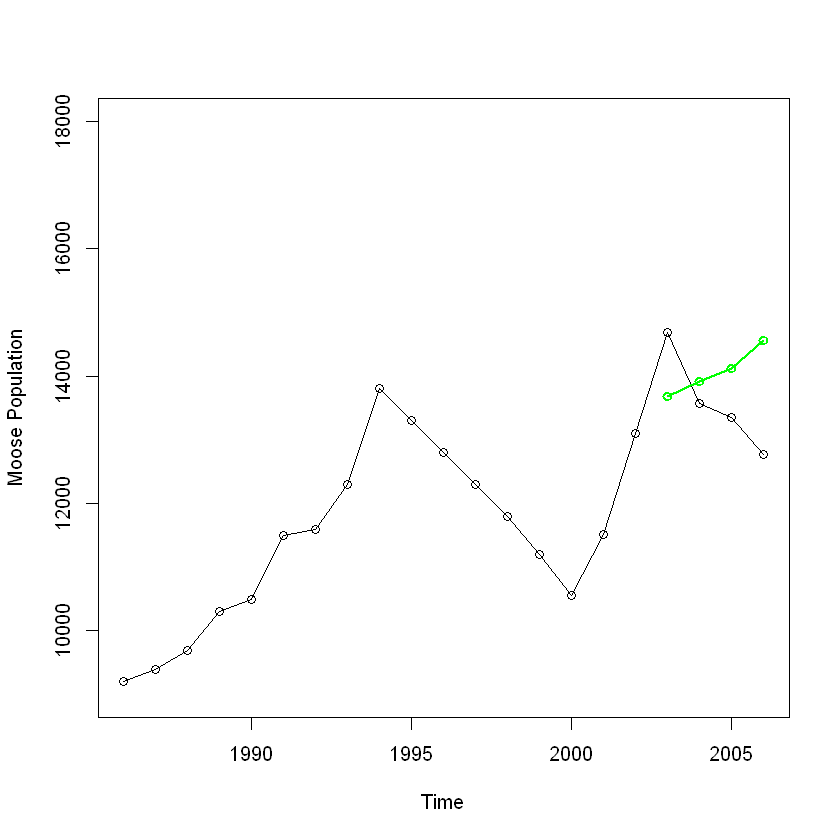

In [14]:
totalMoose = data[,"totalMoose"]
n = length(totalMoose)
nfit = n-4
plot(years[(n-20):n], ts_totalMoose[(n-20):n],type="o", ylim=c(9000,18000), xlab="Time", ylab="Moose Population")
lines(years[(nfit+1):n],final.pred.3,col="green",lwd=2, type="o")